In [17]:
import re
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
from tensorflow.keras.layers import Layer

import matplotlib.pyplot as plt
import warnings
warnings.warn("ignore")
import numpy as np
import pandas as pd

from src.data_handling import load_dataset
from src.config import STRATEGY as strategy
from src.config import (BATCH_SIZE, IMAGE_SIZE, BATCH_SIZE, SIZE_RESIZE, AUTOTUNE, EPOCHS)

/Users/szczekulskij/.pyenv/versions/3.7.13/envs/monet-me-this/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: ignore
  # Remove the CWD from sys.path while we load stuff.


## Load Data

In [18]:
MONET_FILENAMES = tf.io.gfile.glob("../images/artists/monet/monet_tfrec/*.tfrec")
print('Monet TFRecord Files:', len(MONET_FILENAMES))

PHOTO_FILENAMES = tf.io.gfile.glob("../images/random_images/photo_tfrec/*.tfrec")
print('Photo TFRecord Files:', len(PHOTO_FILENAMES))

monet_ds = load_dataset(MONET_FILENAMES, apply_jitter=False)
photo_ds = load_dataset(PHOTO_FILENAMES, apply_jitter=False)

photo_ds_test = load_dataset(PHOTO_FILENAMES, repeat=False, shuffle=False, batch_size=1)

Monet TFRecord Files: 5
Photo TFRecord Files: 20


In [34]:
monet_generator = tf.keras.models.load_model('saved_models/monet_generator.h5')
photos = next(iter(photo_ds))
monesque_photo = monet_generator.predict(photos)

2022-10-09 16:24:52.506159: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


1/1 [==============================] - 10s 10s/step


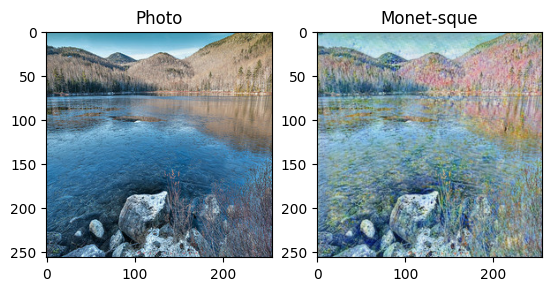

In [35]:
plt.subplot(121)
plt.title('Photo')
plt.imshow(photos[0] * 0.5 + 0.5)

plt.subplot(122)
plt.title('Monet-sque')
plt.imshow(monesque_photo[0] * 0.5 + 0.5)
